In [1]:
import cobra
import pandas as pd
import os
from os.path import join
from cobra import Model, Reaction, Metabolite
from cobra.sampling import sampling
import numpy as np
# os.environ["R_HOME"] = f"{os.environ['CONDA_PREFIX']}\\Lib\\R"
# import rpy2.robjects
from plotnine import *
import matplotlib.pyplot as plt

In [2]:
# Importing the model
model1=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880.xml")
model1.objective = "BIOMASS_RT"  


Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-21


In [3]:
# Lab data
glucose_uptakes= [0.476, 1.114, 1.648, 2.305, 2.66, 3.1] # the fifth glc uptake value was calculated

# All fluxes for getting all rxn names
solution1 = model1.optimize()
all_fluxes = solution1.fluxes.to_frame(name='Flux')

In [25]:
# Get all fluxes on different glucose uptake
all_fluxes_biomass_max = pd.DataFrame(columns=['Glucose uptake', *all_fluxes.index], index=range(len(glucose_uptakes))) #flux_values.index gives the row names column, * extracts the list of strings
biomass_GR = []

for i in range(len(glucose_uptakes)):
    model=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880.xml")
    model.objective = "BIOMASS_RT"  
    model.reactions.EX_glc__D_e.bounds = -(glucose_uptakes[i]), -(glucose_uptakes[i])
    # medium = model.medium
    # medium["EX_glc__D_e"] = glucose_uptakes[i]
    # model.medium = medium
    
    solution = model.optimize()
    all_fluxes_biomass_max.loc[i] = solution.fluxes[['EX_glc__D_e', *all_fluxes.index]].values
    biomass_GR += [solution.objective_value]
all_fluxes_biomass_max.insert(0, 'Biomass growth rate', biomass_GR, True)

all_fluxes_biomass_max

,Biomass growth rate,Glucose uptake,ALCD25yi,MTHFCm,AMPN,DAGCPTer_RT,PYRt2,NNDPRm,HMGCOASm,PDE4,...,EX_2hxmp_e,SALCNHe,EX_btn_e,BTNt2i,EX_fol_e,FOLt,NADtm,EX_pydxn_e,PYDXNtr,RIBFLVt2
0,0.033713,-0.476,0.0,0.0,0.0,0.0,0.0,0.0,-0.003255,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.081992,-1.114,0.0,0.0,0.0,0.0,0.0,0.0,-0.007917,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.122398,-1.648,0.0,0.0,0.0,0.0,0.0,0.0,-0.011818,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.172112,-2.305,0.0,0.0,0.0,0.0,0.0,0.0,-0.016619,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.198974,-2.66,0.0,0.0,0.0,0.0,0.0,0.0,-0.019212,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.232267,-3.1,0.0,0.0,0.0,0.0,0.0,0.0,-0.022427,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Get specific metabolites with their fluxes
exchange_fluxes_table = all_fluxes_biomass_max[['EX_glc__D_e', 'EX_o2_e', 'EX_nh4_e','EX_so4_e','EX_pi_e', 'EX_co2_e']]
exchange_fluxes_table

,EX_glc__D_e,EX_o2_e,EX_nh4_e,EX_so4_e,EX_pi_e,EX_co2_e
0,-0.476,-1.149964,-0.222516,-0.003379,-0.008975,1.276335
1,-1.114,-2.534822,-0.541171,-0.008219,-0.021827,2.842163
2,-1.648,-3.69407,-0.807865,-0.012269,-0.032584,4.152871
3,-2.305,-5.120337,-1.135989,-0.017252,-0.045819,5.765485
4,-2.66,-5.890998,-1.313285,-0.019945,-0.05297,6.636836
5,-3.1,-6.846184,-1.533033,-0.023282,-0.061833,7.716821


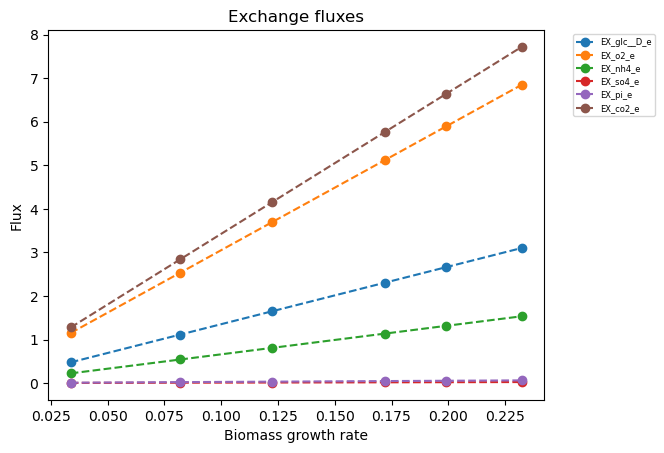

In [27]:
# Exchange fluxes plot
GR_range = all_fluxes_biomass_max['BIOMASS_RT']
plt.plot(GR_range, np.abs(exchange_fluxes_table[exchange_fluxes_table.columns]), 'o--', label = exchange_fluxes_table.columns)

plt.xlabel('Biomass growth rate')
plt.ylabel('Flux')
plt.title("Exchange fluxes")
plt.legend(fontsize=6, loc='upper left', bbox_to_anchor=(1.05, 1))
# plt.yticks(range(0, 20, 1))
plt.show()

In [28]:
PPP_fluxes = all_fluxes_biomass_max[['BIOMASS_RT', 'EX_glc__D_e', 'G6PDH2r', 'TKT1', 'TALA','TKT2', 'XPK','PYRDC','PDHm', 'FPK']]
# Change G6PDH2rp column name to oxpp 
PPP_fluxes = PPP_fluxes.rename(columns = {'G6PDH2r': 'oxpp'})
PPP_fluxes

,BIOMASS_RT,EX_glc__D_e,oxpp,TKT1,TALA,TKT2,XPK,PYRDC,PDHm,FPK
0,0.033713,-0.476,0.0,-0.076355,-0.076355,0.098377,0.0,0.015572,0.427713,0.181042
1,0.081992,-1.114,0.0,-0.1857,-0.704425,-0.201046,0.440304,0.077178,0.950726,0.0
2,0.122398,-1.648,0.0,-0.277214,-1.036583,0.357167,0.0,0.120209,1.384278,0.65729
3,0.172112,-2.305,0.0,-0.389808,-1.44525,-0.422022,0.924256,0.173151,1.917693,0.0
4,0.198974,-2.66,0.0,-0.450646,-1.666066,-0.487888,1.068507,0.201757,2.205916,0.0
5,0.232267,-3.1,0.0,-0.526052,-1.939755,-0.569525,1.247297,0.237213,2.56315,0.0


In [29]:
ATPM_ACITL_fluxes = all_fluxes_biomass_max[['BIOMASS_RT', 'EX_glc__D_e', 'ATPM', 'ACITL', 'ACS']] #ACS - Acetyl-CoA synthetase
ATPM_ACITL_fluxes

,BIOMASS_RT,EX_glc__D_e,ATPM,ACITL,ACS
0,0.033713,-0.476,1.22,0.0,0.184421
1,0.081992,-1.114,1.22,0.0,0.448523
2,0.122398,-1.648,1.22,0.0,0.669559
3,0.172112,-2.305,1.22,0.0,0.941508
4,0.198974,-2.66,1.22,0.0,1.088452
5,0.232267,-3.1,1.22,0.0,1.270579


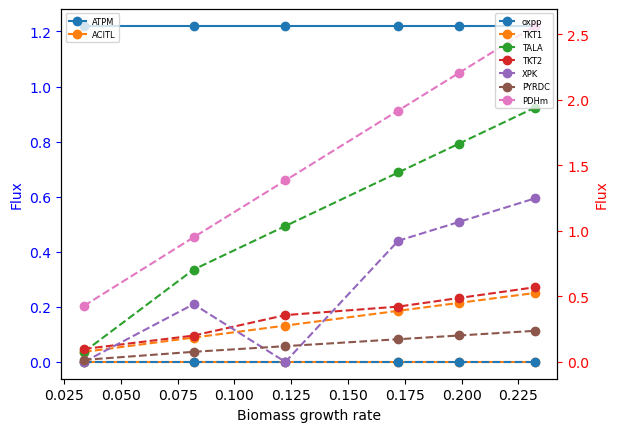

In [30]:
# Plot the PPP enzymes fluxes with ATPM and ACITL on seperate y-axis
GR_range = all_fluxes_biomass_max['BIOMASS_RT']
# Sample data
x = GR_range
y1 = np.abs(ATPM_ACITL_fluxes[['ATPM', 'ACITL']])
y2 = np.abs(PPP_fluxes[['oxpp', 'TKT1', 'TALA','TKT2', 'XPK','PYRDC','PDHm']])

# # Define colors for each label
# colors = {'ATPM': 'black', 'ACITL': 'orange', 'oxpp': 'yellow', 'TKT1': 'green', 'TKT2': 'blue', 'TALA': 'red', 'XPK': 'pink','PYRDC': 'brown' ,'PDHm': 'purple'}
# labels = ['ATPM', 'ACITL', 'oxpp', 'TKT1', 'TKT2', 'TALA', 'XPK','PYRDC','PDHm']
# Create the first plot
fig, ax1 = plt.subplots()

ax1.plot(x, y1, 'o-', label=['ATPM', 'ACITL'])
ax1.set_xlabel('Biomass growth rate')
ax1.set_ylabel('Flux', color='b')
ax1.tick_params('y', colors='b')
ax1.legend(fontsize=6, loc='upper left')

# Create the second y-axis on the right
ax2 = ax1.twinx()

# Plot the second set of data on the right y-axis 
ax2.plot(x, y2, 'o--', label=['oxpp', 'TKT1', 'TALA','TKT2', 'XPK','PYRDC','PDHm'])
ax2.set_ylabel('Flux', color='r')
ax2.tick_params('y', colors='r')
ax2.legend(fontsize=6, loc='upper right')

# Show the plot
plt.show()

In [10]:
# # Get all fluxes to excel
# with pd.ExcelWriter('C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\Simulated_fluxes\\Biomass_maximization\\all_fluxes_dif_glc_uptakes.xlsx') as excel_writer:
#     all_fluxes_dif_glucose_uptakes.to_excel(excel_writer, sheet_name='Glucose uptake range 0.49-3.1', index=True)

In [11]:
# #Calculating the missing glucose uptake form lab data, when growth rate is 0.25
# growth_rates = np.array([0.049, 0.100, 0.151, 0.203, 0.25, 0.301]) 
# glucose_uptakes= np.array([-0.476, -1.114, -1.648, -2.305, -2.6619851, -3.1])

# Getting the missing glucose uptake when GR is 0.25
# from sklearn.linear_model import LinearRegression
# lm = LinearRegression()
# lm.fit(growth_rates[:, None], glucose_uptakes)

# y = lm.coef_ * 0.25 + lm.intercept_
# y


In [12]:
# #  Get all flux values separately for dif growth rates, make them to a csv file
# for i in range(len(glucose_uptakes)):
#     all_fluxes_dif_glucose_uptakes.loc[i].to_csv(f'C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\Simulated_fluxes\\Biomass_maximization\\fluxes_dif_glc_uptake_csv_files\\flux_values_specific_glucose_uptake_{glucose_uptakes[i]}.csv', index=True)